# Pysynphot

 - Flux values
 - Magnitudes
 - Photon counts

In [48]:
import numpy as np
import pysynphot as S
import matplotlib.pyplot as plt

In [49]:
# def custom_bandpass(wl, pass_range, value=1):
#     """
#     Outputs a scaled custom binary bandpass
#     """
    

# def apply_filter(stars, colour):
#     """
#     Generates a binary filter based on the colour selected and passes the stars 
#     spectrum through this filter, being normalised to its actual magnitude as observed
#     outputs an oberservation from this spectrum for use in other programs
#     """

#     throughput = custom_bandpass(wavels, [4000,5250]) # 1250nm range

    

    

In [68]:
aperture = 10 #cm diameter
central_obscuration = 0 # Set later (use diameter)
r = (aperture-central_obscuration)/2
collecting_area = (np.pi * r**2)
S.refs.setref(area=collecting_area) # Takes units of cm^2
print(collecting_area)

78.53981633974483


In [72]:
nwavels = 1001
wavels = np.linspace(4450,5450,nwavels)
bandpass = S.ArrayBandpass(wavels, [1 for wl in wavels])
bandpass?

Signature:      bandpass(wavelengths)
Type:           ArraySpectralElement
String form:    UnnamedArrayBandpass
File:           /anaconda3/lib/python3.7/site-packages/pysynphot/spectrum.py
Docstring:     
Class to handle :ref:`bandpass from arrays <pysynphot-bandpass-arrays>`.

Parameters
----------
wave, throughput : array_like
    Wavelength and throughput arrays.

waveunits : str
    Wavelength unit, as accepted by `~pysynphot.units.Units`.
    Default is Angstrom.

name : str
    Description of the spectrum. Default is "UnnamedArrayBandpass".

Attributes
----------
name
    Same as input.

warnings : dict
    To store warnings.

isAnalytic : bool
    This is always `False`.

binset : `None`
    This is reserved to be used by `~pysynphot.obsbandpass.ObsModeBandpass`.

waveunits : `~pysynphot.units.Units`
    User unit for wavelength.

wave, throughput : array_like
    Wavelength set in user unit and associated unitless throughput.

Raises
------
ValueError
    Mismatched wavelength 

In [70]:
# use Phoenix models for Teff, metallicity (dex), log g in that order 

# alpha cen A: Teff = 5790, Z = 0.20, log g = 4.30
acenA = S.Icat('phoenix',5790,0.2,4.30)
# specA = acenA.sample(wavels)

# alpha cen B: Teff = 5260, Z = 0.23, log g = 4.37
acenB = S.Icat('phoenix',5260,0.23,4.37)
# specB = acenB.sample(wavels)

In [54]:
acenA_mag = 1.33
acenB_mag = 0.01

filtered_specA = acenA.renorm(acenA_mag, 'vegamag', bandpass)
filtered_specB = acenB.renorm(acenB_mag, 'vegamag', bandpass)

acenA_obs = S.Observation(filtered_specA, bandpass, binset=wavels)
acenB_obs = S.Observation(filtered_specB, bandpass, binset=wavels)

In [55]:
print(acenA.waveunits)
print(acenA.fluxunits)

angstrom
flam


In [61]:
acenA_obs?

Signature:      acenA_obs(wavelength)
Type:           Observation
String form:    phoenix(Teff=5790,metallicity=0.2,logG=4.3) * 8.54938e-17 * UnnamedArrayBandpass
File:           /anaconda3/lib/python3.7/site-packages/pysynphot/observation.py
Docstring:     
Class to handle an :ref:`observation <pysynphot-observation>`.
An observation is the end point of a chain of spectral manipulation.

Most `~pysynphot.obsbandpass.ObsBandpass` objects have a built-in
``binset`` that is optimized for use with the specified observing
mode (also see :ref:`pysynphot-wavelength-table`).
Specifying the ``binset`` here would override the built-in one.

Parameters
----------
spec : `~pysynphot.spectrum.SourceSpectrum`
    Source spectrum.

band : `~pysynphot.spectrum.SpectralElement`
    Bandpass.

binset : array_like or `None`
    Wavelength values to be used for binning when converting to counts.
    See :meth:`initbinset`.

force
    See :meth:`~pysynphot.observation.Observation.validate_overlap`.

Attri

phoenix(Teff=5790,metallicity=0.2,logG=4.3) * 8.54938e-17 * UnnamedArrayBandpass


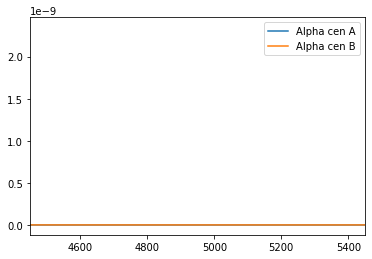

In [66]:
print(acenA_obs.name)
plt.plot(acenA_obs.flux, label="Alpha cen A")
plt.plot(acenB_obs.flux, label="Alpha cen B")
plt.xlim(4450, 5450)
plt.legend()
plt.show()

angstrom
flam
5000


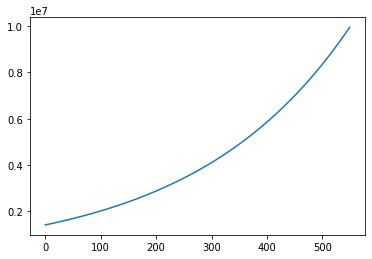

In [15]:
plt.plot(acenA.wave[4450:5450])